In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
from datetime import datetime
import unicodedata

In [2]:
datetime.now()

datetime.datetime(2020, 3, 23, 15, 7, 47, 947061)

In [3]:
url = 'https://www.health.gov.au/news/health-alerts/novel-coronavirus-2019-ncov-health-alert/coronavirus-covid-19-current-situation-and-case-numbers'
content = requests.get(url).content

In [4]:
soup = BeautifulSoup(content)
data = soup.findAll(text=re.compile('As .+')) + \
        soup.findAll(text=re.compile('.*(?:(Australian Capital Territory)|(Queensland)|(Victoria)|(New South Wales)|(South Australia)|(Western Australia)|(Northern Territory)|(Tasmania)|(Diamond Princess))')) 
data = ' '.join(data)
data

'As at 3pm on 23\xa0March 2020, there have been\xa0 Australian Capital Territory New South Wales Northern Territory Queensland South Australia Tasmania Victoria Western Australia **Includes Diamond Princess repatriation cases: Qld (3), SA (1), Vic (4), WA (2, including 1 death)'

In [5]:
cases_str = unicodedata.normalize("NFKD", data)

In [6]:
cases_str

'As at 3pm on 23 March 2020, there have been  Australian Capital Territory New South Wales Northern Territory Queensland South Australia Tasmania Victoria Western Australia **Includes Diamond Princess repatriation cases: Qld (3), SA (1), Vic (4), WA (2, including 1 death)'

In [7]:
date_time_str = re.search('As .+ (\d+ \w+ 202\d)' ,cases_str).group(1)
date_time_str

'23 March 2020'

In [8]:
data_date_time = datetime.strptime(date_time_str, '%d %B %Y').strftime('%Y-%m-%d')
data_date_time

'2020-03-23'

In [9]:
# m = re.search('there were (\d+) confirmed cases', cases_str)
# australia = int(m.group(1))
# australia

In [10]:
# m = re.search('(\d+) in New South Wales', cases_str)
# nsw = int(m.group(1))


In [11]:
# m = re.search('(\d+) in Victoria', cases_str)
# victoria = int(m.group(1))

In [12]:
# m = re.search('(\d+) in South Australia', cases_str)
# sa = int(m.group(1))

In [13]:
# m = re.search('(\d+) in Queensland', cases_str)
# qld = int(m.group(1))

In [14]:
# m = re.search('(\d+) in Tasmania', cases_str)
# tas = int(m.group(1))


In [15]:
# m = re.search('(\d+) in .* Australian Capital Territory', cases_str)
# act = int(m.group(1))



In [16]:
# m = re.search('(\d+) in Northern Territory', cases_str)
# nt = int(m.group(1))


In [17]:
# m = re.search('(\d+) .* Diamond Princess', cases_str)
# wa = int(m.group(1))


### Dataframe

In [18]:
df1 = pd.read_html(url)[0]
df1 = df1.set_index(0).T
df1.insert(0, 'date', data_date_time)
df1 = df1.drop(['Location'], axis=1)
df = df1.rename(columns={
    'Total**':'australia',
    'Australian Capital Territory':'act',
    'New South Wales':'nsw',
    'Queensland':'qld',
    'South Australia':'sa',
    'Tasmania':'tas',
    'Victoria':'victoria',
    'Western Australia':'wa',
    'Northern Territory':'nt',
})

In [19]:
df.drop(columns=df.columns[-1], inplace=True)
df

,date,act,nsw,nt,qld,sa,tas,victoria,wa,australia
1,2020-03-23,32,704,4,319,134,21,355,140,1709


In [20]:
assert int(df['australia'])>0

In [21]:
df

,date,act,nsw,nt,qld,sa,tas,victoria,wa,australia
1,2020-03-23,32,704,4,319,134,21,355,140,1709


### Save to file

In [22]:
from pathlib import Path
csv_file = '../data/australia-cases.csv'

if Path(csv_file).exists():
    # read out the old data
    old_df = pd.read_csv(csv_file)
    df = df.append(old_df)
df.drop_duplicates(subset=['date'], inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [23]:
df.sort_values(by=['date'], inplace=True)
df.to_csv(csv_file, index=False)
df

,"*Note that under National Notifiable Diseases Surveillance System reporting requirements, cases are reported based on their Australian jurisdiction of residence rather than where they were detected. For example, a case reported previously in the NT in a NSW resident is counted in the national figures as a NSW case. **Includes Diamond Princess repatriation cases: Qld (3), SA (1), Vic (4), WA (2, including 1 death)",act,australia,date,nsw,nt,qld,sa,tas,victoria,wa
0,NaN,NaN,12,2020-02-04,4,NaN,2,2,NaN,4,NaN
1,NaN,NaN,13,2020-02-05,4,NaN,3,2,NaN,4,NaN
2,NaN,NaN,14,2020-02-06,4,NaN,4,2,NaN,4,NaN
3,NaN,NaN,15,2020-02-07,4,NaN,5,2,NaN,4,NaN
4,NaN,NaN,15,2020-02-08,4,NaN,5,2,NaN,4,NaN
5,NaN,NaN,15,2020-02-09,4,NaN,5,2,NaN,4,NaN
6,NaN,NaN,15,2020-02-10,4,NaN,5,2,NaN,4,NaN
7,NaN,NaN,15,2020-02-11,4,NaN,5,2,NaN,4,NaN
8,NaN,NaN,15,2020-02-12,4,NaN,5,2,NaN,4,NaN
9,NaN,NaN,15,2020-02-13,4,NaN,5,2,NaN,4,NaN


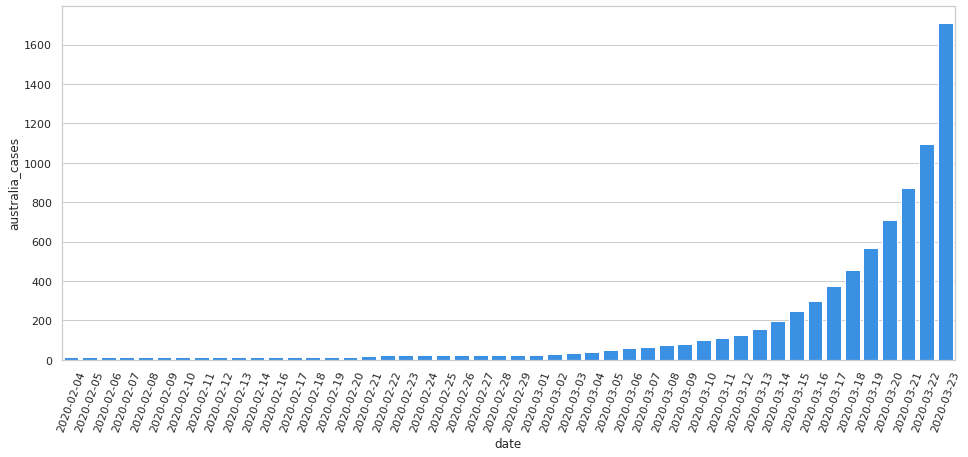

In [24]:
# plot
df['australia_cases']= df['australia'].apply(lambda x: int(x))

import seaborn as sns


sns.set(rc={'figure.figsize':(16,6.5)})
sns.set(style="whitegrid")


bar_chart = sns.barplot(x='date', y='australia_cases', color='dodgerblue', data=df)
bar_chart.tick_params(axis='x', labelrotation=70)


In [25]:
png_file = '../images/australia-cases.png'
bar_chart_fig = bar_chart.get_figure()
bar_chart_fig.savefig(png_file)
